In [64]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)
#print(y_train)
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


In [66]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X_train)
X_train_std= sc.transform(X_train)
X_test_std=sc.transform(X_test)
#print(X_test_std)
X_combined_std=np.vstack((X_train_std, X_test_std))
y_combined= np.hstack((y_train, y_test))

In [67]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(max_iter=40, tol= 0.001, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
y_pred=ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test !=y_pred).sum())

Misclassified samples: 4


In [69]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [70]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [73]:
def plot_decision_regions(X,y,classifier, test_idx=None, resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max=X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max=X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], 
                    alpha=0.8, cmap=cmap(idx), marker=markers[idx], label=cl)
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:1], cmap='', 
                    alpha=0.1, linewidths=1, marker='o', 
                    s=55, label ='test set')

ValueError: x and y must be the same size

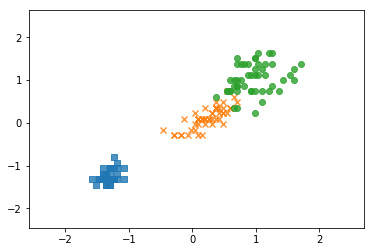

In [74]:
#X_combined_std=np.vstack((X_train_std, X_test_std))
#y_combined= np.hstack((y_train, y_test))
#print(X_combined_std, y_combined)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal lenght [standarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc='upper left')
plt.show()